# Import All Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')


# Headline Length Analysis

### Calculate headline length


In [3]:
df['headline_length'] = df['headline'].apply(len)


In [4]:
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:", headline_stats)

Headline Length Statistics: count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### Visualize the distribution:

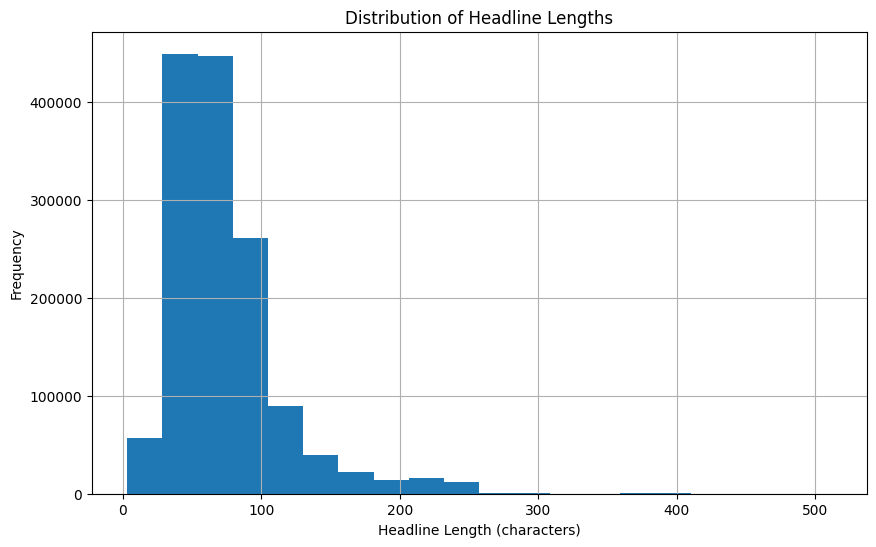

In [5]:

plt.figure(figsize=(10, 6))
df['headline_length'].hist(bins=20)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.savefig('../data/headline_length_distribution.png')
plt.show()

## Number of Articles per Publisher

### 1 Count articles per publisher

In [6]:
publisher_counts = df['publisher'].value_counts()


In [7]:
publisher_stats = publisher_counts.describe()
print("Publisher Activity Statistics:", publisher_stats)

Publisher Activity Statistics: count      1034.000000
mean       1361.052224
std       11501.954263
min           1.000000
25%           3.000000
50%          11.000000
75%          93.500000
max      228373.000000
Name: count, dtype: float64


### 2 Visualize the most active publishers:

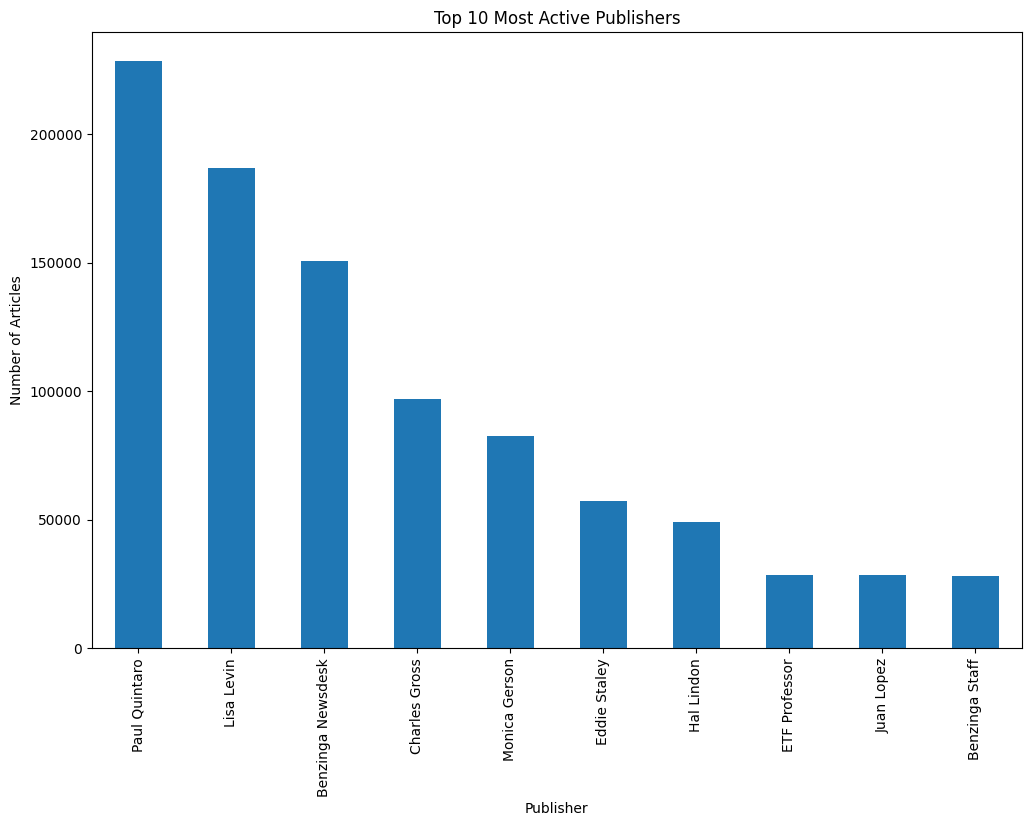

In [8]:
plt.figure(figsize=(12, 8))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.savefig('../data/top_publishers_bar_chart.png')
plt.show()


## Publication Date Analysis

### Analyze publication dates:

####  Convert the 'date' column to datetime format


In [23]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)


#### Extract components from the date


In [24]:
df['date_only'] = df['date'].dt.date


In [25]:
date_counts = df['date_only'].value_counts().sort_index()


#### Plot the publication frequency over time


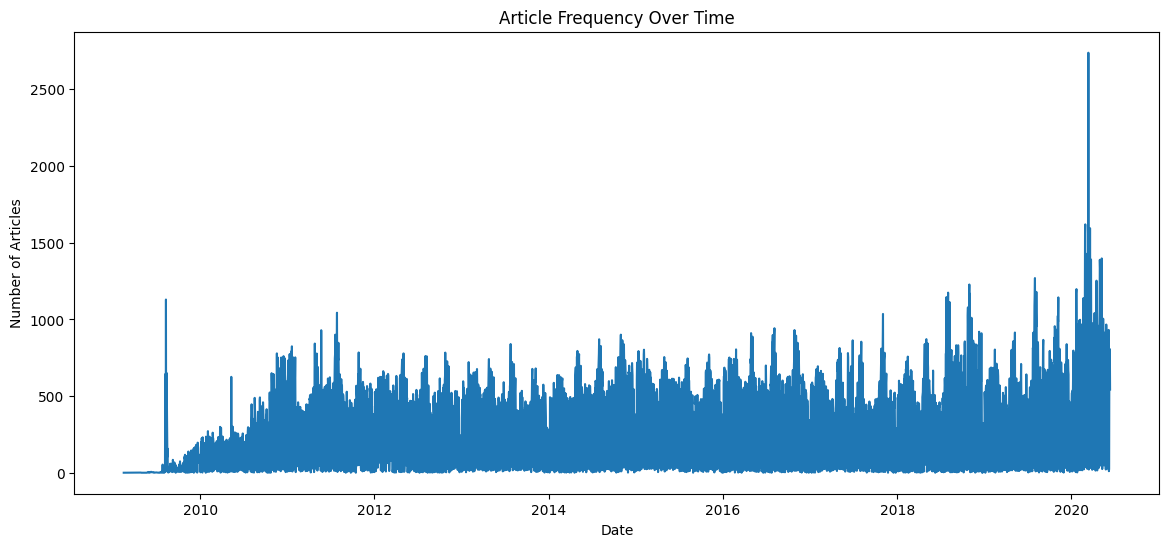

In [26]:
plt.figure(figsize=(14, 6))
date_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()